In [1]:
import numpy as np
import sympy as sy
from sympy import Matrix
import matplotlib.pyplot as plt
from itertools import product
import math

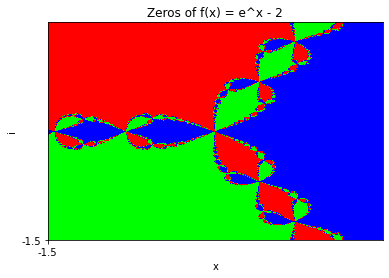

None


In [2]:
def plot_basins(f, Df, zeros, domain, res=math.floor(1000/8), iters=15):
    """Plot the basins of attraction of f on the complex plane.

    Parameters:
        f (function): A function from C to C.
        Df (function): The derivative of f, a function from C to C.
        zeros (ndarray): A 1-D array of the zeros of f.
        domain ([r_min, r_max, i_min, i_max]): A list of scalars that define
            the window limits and grid domain for the plot.
        res (int): A scalar that determines the resolution of the plot.
            The visualized grid has shape (res, res).
        iters (int): The exact number of times to iterate Newton's method.
    """

    def newton(f, x0, Df, tol=1e-5, maxiter=15, alpha=1.):
        """Use Newton's method to approximate a zero of the function f.

        Parameters:
            f (function): a function from R^n to R^n (assume n=1 until Problem 5).
            x0 (float or ndarray): The initial guess for the zero of f.
            Df (function): The derivative of f, a function from R^n to R^(nxn).
            tol (float): Convergence tolerance. The function should returns when
                the difference between successive approximations is less than tol.
            maxiter (int): The maximum number of iterations to compute.
            alpha (float): Backtracking scalar (Problem 3).

        Returns:
            (float or ndarray): The approximation for a zero of f.
            (bool): Whether or not Newton's method converged.
            (int): The number of iterations computed.
        """
        # Newton's method
        last = x0
        for i in range(maxiter):
            new = last - (f(last) / Df(last))
            last = new
        return last

    # declair axis points for real and imaginary numbers
    rAxis = np.linspace(domain[0], domain[1], res) # imaginary numbers
    iAxis = np.linspace(domain[2], domain[3], res) # real numbers

    resRes = []

    result = []

    for r in rAxis: #loop through each real number
        row = []
        for i in iAxis: #loop through each imaginary number
            result.append(newton(f, r+i, Df, maxiter=iters))
            row.append(np.argmin(abs(zeros - result[-1])))
        resRes.append(row)

    resRes = np.array(resRes).T

    fig, ax = plt.subplots(1)

    # plotting graphs
    ax.pcolormesh(resRes, cmap="brg")
    ax.set_xticks(np.arange(0,res,res))
    ax.set_xticklabels( [ round(rAxis[i],1) for i in range(0,res,res) ] )

    # setting labels
    ax.set_yticks(np.arange(0, res, res))
    ax.set_yticklabels([round(rAxis[i], 1) for i in range(0, res, res)])
    ax.set_title("Zeros of f(x) = e^x - 2")
    ax.set_xlabel("x")
    ax.set_ylabel("i")
    plt.show()

f = lambda x: x**3 - 1
Df = lambda x: 3 * x ** 2
domain = [-1.5,1.5,-1.5j,1.5j]
zeros = [1, -.5 + np.sqrt(3)/2 * 1j, -.5 - np.sqrt(3)/2 * 1j]
# zeros = [0,-1,1]
print(plot_basins(f, Df, zeros, domain, res=1000))

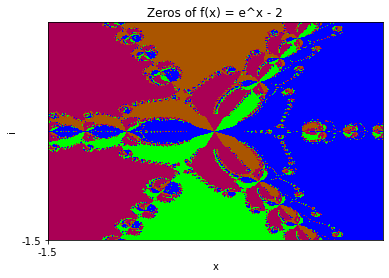

None


In [3]:
f = lambda x: x**6 - x**3 + 2.2
Df = lambda x: 6*x**5 - 3*x**2
domain = [-1.5,1.5,-1.5j,1.5j]
zeros = [1, -1, 1j, -1j]
# zeros = [0,-1,1]
print(plot_basins(f, Df, zeros, domain, res=4000))
